# Deri Kanseri Sınıflandırma

#### Bu projede görüntülerden deri kanseri sınıflandırma uygulaması yapılmaktadır.

#### Import Libraries

In [14]:
import cv2
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
labels=['Cancer','Non_Cancer']
img_path='Skin_Data/'

In [3]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        print(img_path+label+'/'+img_file)
        img_list.append(img_path+label+'/'+img_file)
        
        label_list.append(label)
        

Skin_Data/Cancer/1007-1.jpg
Skin_Data/Cancer/1010-01.JPG
Skin_Data/Cancer/1012-2.JPG
Skin_Data/Cancer/1031-1.jpg
Skin_Data/Cancer/1051-3(94).jpg
Skin_Data/Cancer/1051-3(95).jpg
Skin_Data/Cancer/113-1.JPG
Skin_Data/Cancer/1157-01.JPG
Skin_Data/Cancer/120.2.JPG
Skin_Data/Cancer/1239-2.JPG
Skin_Data/Cancer/14-8.JPG
Skin_Data/Cancer/1435-1.JPG
Skin_Data/Cancer/1435-2.JPG
Skin_Data/Cancer/1435-3.JPG
Skin_Data/Cancer/1540-4.JPG
Skin_Data/Cancer/1543.JPG
Skin_Data/Cancer/1545.JPG
Skin_Data/Cancer/156.JPG
Skin_Data/Cancer/1563-03.jpg
Skin_Data/Cancer/1654-1.jpg
Skin_Data/Cancer/17 (1).JPG
Skin_Data/Cancer/1703.JPG
Skin_Data/Cancer/1714-01.jpg
Skin_Data/Cancer/1714-02.jpg
Skin_Data/Cancer/1718-2.jpg
Skin_Data/Cancer/1777-1.JPG
Skin_Data/Cancer/1780.1.JPG
Skin_Data/Cancer/1780.JPG
Skin_Data/Cancer/1789-02.JPG
Skin_Data/Cancer/1811-3.JPG
Skin_Data/Cancer/1847 (7).JPG
Skin_Data/Cancer/1847.JPG
Skin_Data/Cancer/1861-02.JPG
Skin_Data/Cancer/1864-1.JPG
Skin_Data/Cancer/1877(2).JPG
Skin_Data/Cancer/18

#### Load Data

In [4]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [5]:
df.head()

,img,label
0,Skin_Data/Cancer/1007-1.jpg,Cancer
1,Skin_Data/Cancer/1010-01.JPG,Cancer
2,Skin_Data/Cancer/1012-2.JPG,Cancer
3,Skin_Data/Cancer/1031-1.jpg,Cancer
4,Skin_Data/Cancer/1051-3(94).jpg,Cancer


In [6]:
df.tail()

,img,label
283,Skin_Data/Non_Cancer/953-1.JPG,Non_Cancer
284,Skin_Data/Non_Cancer/954-3.JPG,Non_Cancer
285,Skin_Data/Non_Cancer/955.JPG,Non_Cancer
286,Skin_Data/Non_Cancer/984.JPG,Non_Cancer
287,Skin_Data/Non_Cancer/986-1.JPG,Non_Cancer


In [7]:
d={'Cancer':1,'Non_Cancer':0}

In [8]:
df['label']=df['label'].map(d) #label_encoder

In [9]:
df.tail()

,img,label
283,Skin_Data/Non_Cancer/953-1.JPG,0
284,Skin_Data/Non_Cancer/954-3.JPG,0
285,Skin_Data/Non_Cancer/955.JPG,0
286,Skin_Data/Non_Cancer/984.JPG,0
287,Skin_Data/Non_Cancer/986-1.JPG,0


In [10]:
X=[]
for img in df['img']:
    img=cv2.imread(str(img))
    img=cv2.resize(img,(170,170)) #boyutu 170*170
    img=img/255.0
    X.append(img)

In [11]:
X=np.array(X)

In [12]:
y=df['label']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

### Model building

In [16]:
from tensorflow.keras.layers import Input, Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(Input(shape=(170, 170, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2, activation='softmax'))  # 10 farklı cevap classification 0-9 kadar olan rakamlar
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,verbose=1)

Epoch 1/20
8/8 [==============================] - 5s 642ms/step - loss: 0.1340 - accuracy: 0.9391 - val_loss: 0.2191 - val_accuracy: 0.9138
Epoch 2/20
8/8 [==============================] - 5s 602ms/step - loss: 0.1062 - accuracy: 0.9565 - val_loss: 0.2327 - val_accuracy: 0.8793
Epoch 3/20
8/8 [==============================] - 5s 599ms/step - loss: 0.0741 - accuracy: 0.9739 - val_loss: 0.1808 - val_accuracy: 0.8966
Epoch 4/20
8/8 [==============================] - 5s 635ms/step - loss: 0.0561 - accuracy: 0.9826 - val_loss: 0.2931 - val_accuracy: 0.8966
Epoch 5/20
8/8 [==============================] - 4s 541ms/step - loss: 0.0545 - accuracy: 0.9913 - val_loss: 0.2262 - val_accuracy: 0.9138
Epoch 6/20
8/8 [==============================] - 4s 494ms/step - loss: 0.0280 - accuracy: 0.9957 - val_loss: 0.2193 - val_accuracy: 0.8793
Epoch 7/20
8/8 [==============================] - 4s 488ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.6521 - val_accuracy: 0.7759
Epoch 8/20
8/8 [====

In [20]:
model.save('cancer_cnn.h5')

C:\Users\emura\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Transfer Learning 
VGGNet, ResNet50, Inceptionv3, Xception, MobileNetv2, Transfer learning

In [5]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
data_dir='Skin_Data'
img_width,img_heigth=224,224
data=ImageDataGenerator(rescale=1/255, 
                                validation_split=.20)
train_datagen=data.flow_from_directory(directory=data_dir, target_size=(img_width,img_heigth),
                                class_mode='binary', subset='training')

test_datagen=data.flow_from_directory(directory=data_dir, target_size=(img_width,img_heigth),
                                class_mode='binary', subset='validation')

Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


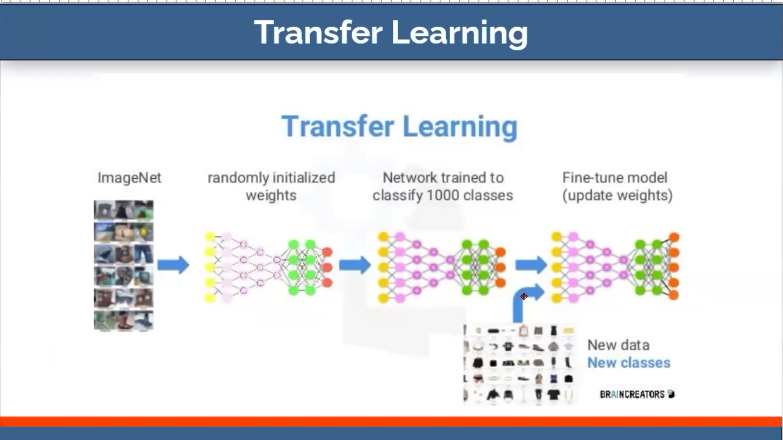

In [18]:
base_model=ResNet50(weights='imagenet',input_shape=(img_width,img_heigth,3))
model=Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_datagen,epochs=10,validation_data=test_datagen)

Epoch 1/10
8/8 [==============================] - 43s 5s/step - loss: 0.6739 - accuracy: 0.7069 - val_loss: 0.6491 - val_accuracy: 0.7143
Epoch 2/10
8/8 [==============================] - 39s 4s/step - loss: 0.6373 - accuracy: 0.7069 - val_loss: 0.6181 - val_accuracy: 0.7143
Epoch 3/10
8/8 [==============================] - 38s 5s/step - loss: 0.6112 - accuracy: 0.7069 - val_loss: 0.6020 - val_accuracy: 0.7143
Epoch 4/10
8/8 [==============================] - 38s 5s/step - loss: 0.6048 - accuracy: 0.7069 - val_loss: 0.5983 - val_accuracy: 0.7143
Epoch 5/10
8/8 [==============================] - 31s 4s/step - loss: 0.6066 - accuracy: 0.7069 - val_loss: 0.5994 - val_accuracy: 0.7143
Epoch 6/10
8/8 [==============================] - 30s 4s/step - loss: 0.6073 - accuracy: 0.7069 - val_loss: 0.5983 - val_accuracy: 0.7143
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 0.6048 - accuracy: 0.7069

KeyboardInterrupt: 

In [21]:
base_model=VGG16(weights='imagenet',input_shape=(img_width,img_heigth,3),include_top=False)
model=Sequential()

58889256/58889256 [==============================] - 18s 0us/step


In [ ]:
model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_datagen,epochs=10,validation_data=test_datagen)

Epoch 1/10
8/8 [==============================] - 169s 21s/step - loss: 5.1001 - accuracy: 0.5172 - val_loss: 3.8976 - val_accuracy: 0.7143
Epoch 2/10
3/8 [==========>...................] - ETA: 1:43 - loss: 3.4845 - accuracy: 0.7083

In [ ]:
model.summary()